## Lab - EDA Univariate Analysis: Diving into Amazon UK Product Insights

**Objective**: Explore the product listing dynamics on Amazon UK to extract actionable business insights. By understanding the distribution, central tendencies, and relationships of various product attributes, businesses can make more informed decisions on product positioning, pricing strategies, and inventory management.

**Dataset**: This lab utilizes the [Amazon UK product dataset](https://www.kaggle.com/datasets/asaniczka/uk-optimal-product-price-prediction/)
which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
df=pd.read_csv("C:/Users/Amin/Documents/amz_uk_price_prediction_dataset.csv")
df

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


### Part 1: Understanding Product Categories

**Business Question**: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

1. **Frequency Tables**:
    - Generate a frequency table for the product `category`.
    - Which are the top 5 most listed product categories?


In [2]:
#Frequency table for the product category
frequency_table=df['category'].value_counts()
frequency_table

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
                                           ...  
Alexa Built-In Devices                       107
Motorbike Chassis                            107
Plugs                                        107
Smart Home Security & Lighting               104
Smart Speakers                                54
Name: count, Length: 296, dtype: int64

In [3]:
top_5_categories=frequency_table.head(5)
top_5_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Name: count, dtype: int64

In [21]:
top_10_categories=frequency_table.head(10)
top_10_categories

category
Sports & Outdoors                         836265
Beauty                                     19312
Handmade Clothing, Shoes & Accessories     19229
Bath & Body                                19092
Birthday Gifts                             18978
Manicure & Pedicure Products               18940
Skin Care                                  18769
Make-up                                    18756
Hair Care                                  18735
Fragrances                                 18564
Name: count, dtype: int64


2. **Visualizations**:
    - Display the distribution of products across different categories using a bar chart. *If you face problems understanding the chart, do it for a subset of top categories.*
    - For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

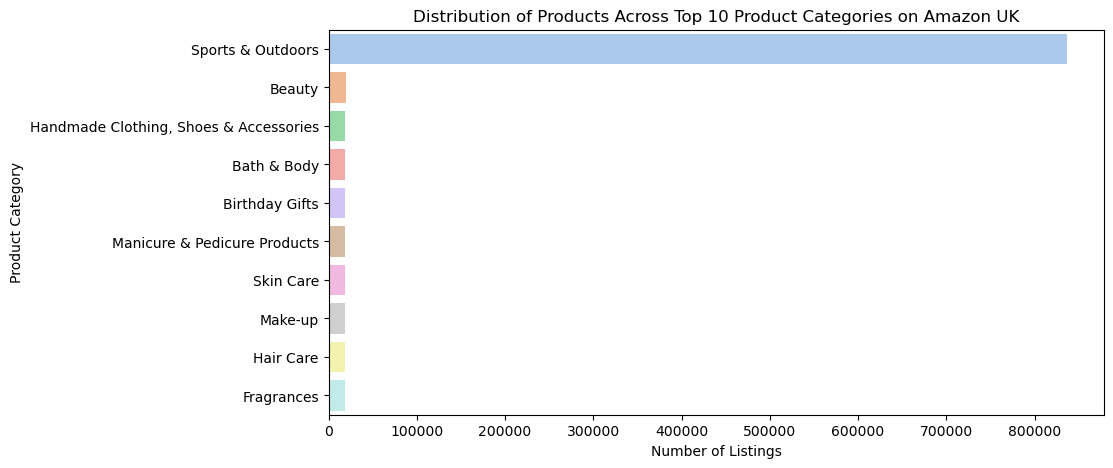

In [ ]:
# Plotting a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="pastel", hue=top_10_categories.index)
plt.ylabel("Product Category")
plt.xlabel("Number of Listings")
plt.title("Distribution of Products Across Top 10 Product Categories on Amazon UK")
plt.show()

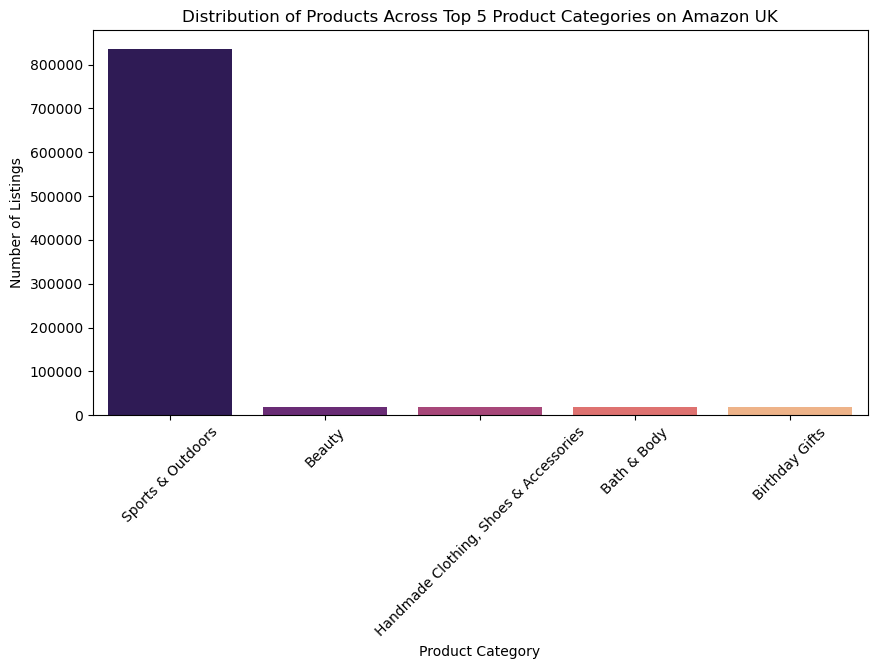

In [25]:
#Visualization 
# Plotting a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x=top_5_categories.index, y=top_5_categories.values, palette="magma", hue=top_5_categories.index)
plt.xticks(rotation=45)
plt.xlabel("Product Category")
plt.ylabel("Number of Listings")
plt.title("Distribution of Products Across Top 5 Product Categories on Amazon UK")
plt.show()

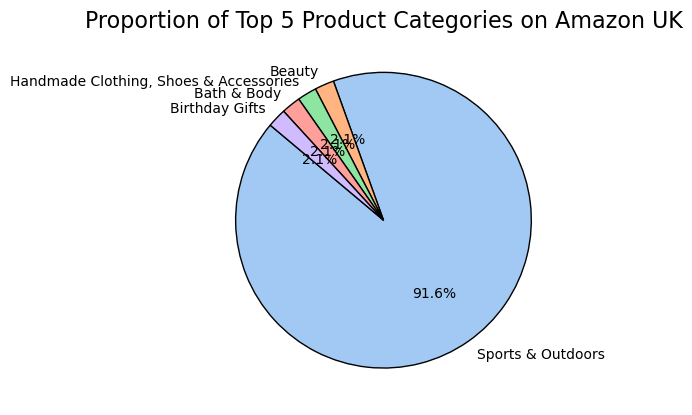

In [20]:
# Pie chart
plt.figure(figure=(8, 8))
plt.pie(top_5_categories, labels=top_5_categories.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"),wedgeprops={"edgecolor": "black"})
plt.title("Proportion of Top 5 Product Categories on Amazon UK", fontsize=16)
plt.show()


In [ ]:
# The sports & Outdoors category dominates the listings with 91.6%.

### Part 2: Delving into Product Pricing

**Business Question**: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `price` of products.
    - What's the average price point of products listed? How does this compare with the most common price point (mode)?


In [39]:
mean_price=df['price'].mean().round()
mode_price=df['price'].mode()[0]
median_price=df['price'].median()

print(f'Mean Price:{mean_price}')
print(f'\nMedian Price:{median_price}')
print(f'\nMode Price:{mode_price}')


Mean Price:89.0

Median Price:19.09

Mode Price:9.99


In [ ]:
# It seems in the dataset there are many low_priced products with most common price point of 9.99.
#  However, there are probably some high-priced products pulling the average or mean higher. 

2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, range, and interquartile range for product `price`.
    - How varied are the product prices? Are there any indicators of a significant spread in prices?

In [ ]:
vars_price=df['price'].var()
std_dev_price=df['price'].std()
min_price=df['price'].min()
max_price=df['price'].max()
range_price=max_price-min_price
interquartile_price=df['price'].quantile([0.25, 0.75])


print(f'Variance of price: {vars_price}')
print(f'\nStandard deviation of price: {std_dev_price}')
print(f'\nMinimum Price: £ {min_price}')
print(f'\nMaximum:  £{max_price}')
print(f'\nPrice range: £{range_price}')
print(f'\nInterquartile range: \n{interquartile_price}')


Variance of price: 119445.48532256528

Standard deviation of price: 345.60886175352226

Minimum Price: £ 0.0

Maximum:  £100000.0

Price range: £ 100000.0

Interquartile range: 
0.25     9.99
0.75    45.99
Name: price, dtype: float64


In [ ]:
# The product prices are highly varied, the high variance indicates that the prices are widely dispersed.
#Some products are priced very low, while some are priced extremely high.
#Standard deviation indicated that it deviates substantially from the mean.This shows large variation.
#The Range of 100,000 from 0 to 100,000 shows a large difference between the minimum and maximum price points.
#Meaning the extremely high prices are pulling the distribution upward.
# The IQR indicates that 50% of the products are priced within the range of 9.99 and 45.99, which shows that most of the products have reasonable prices compared to the other extreme prices.

3. **Visualizations**:
    - Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. *If its hard to read these diagrams, think why this is, and explain how it could be solved.*.
    - Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing. 

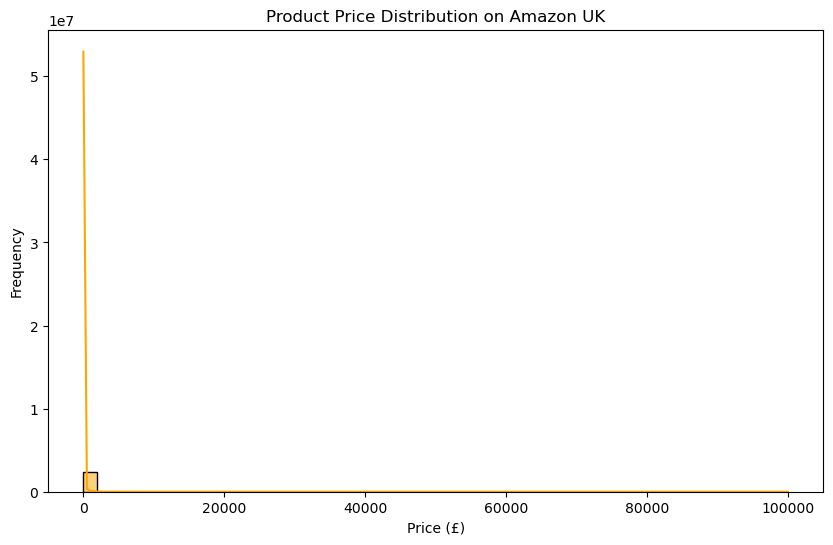

In [47]:
#Histogram

plt.figure(figsize=(10,6))
sns.histplot(df['price'], bins=50, kde=True, color='orange') 
plt.title('Product Price Distribution on Amazon UK')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.show()


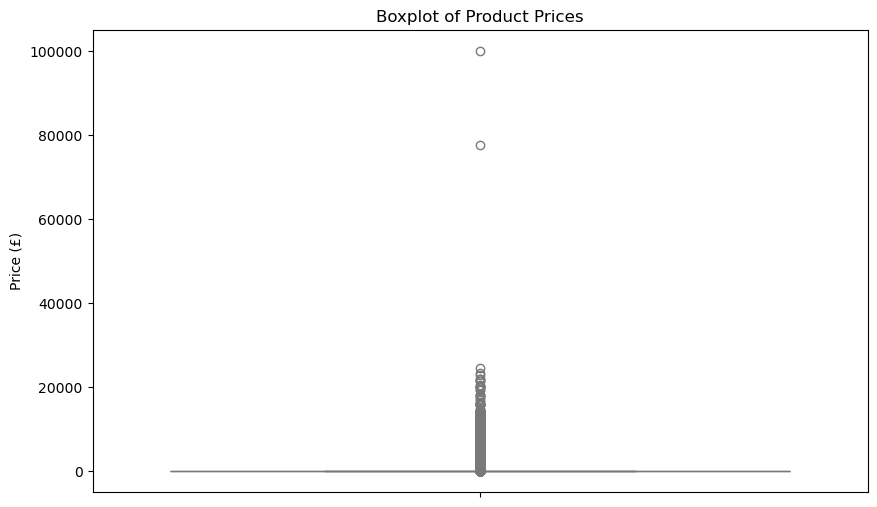

In [60]:
# Plotting the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot( df['price'], color="lightblue", whis=1.5)
plt.title('Boxplot of Product Prices')
plt.ylabel('Price (£)')
plt.show()

In [ ]:
#Yes, there are products that are priced significantly higher than the rest.

### Part 3: Unpacking Product Ratings

**Business Question**: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

1. **Measures of Centrality**:
    - Calculate the mean, median, and mode for the `rating` of products.
    - How do customers generally rate products? Is there a common trend?

In [66]:
mean_rating=df['stars'].mean()
mode_rating=df['stars'].mode()[0]
median_rating=df['stars'].median()

print(f'Mean Rating:{mean_rating}')
print(f'\nMedian Rating:{median_rating}')
print(f'\nMode Rating:{mode_rating}')


Mean Rating:2.152836472966065

Median Rating:0.0

Mode Rating:0.0


In [ ]:
#Mean rating is of 2.15 seems quite low for the average rating of the produts.

#Median rating of 0 is unusual, normally it is expected to be higher, but there could a couple of reasons behind it such as a lot of products have no ratings or 0 star rating.
#This could be true for products which are new or unreviewed.

#The mode of 0 indicates that most products have 0 star rating or no rating at all.

#Commond trend is that a lot of the products may have no customer ratings or they received poor or 0 star reviews.
#It should be investigated if there are a large number of unreviewed products or this is happening because of a smaller group of poorly rated products. 


2. **Measures of Dispersion**:
    - Determine the variance, standard deviation, and interquartile range for product `rating`.
    - Are the ratings consistent, or is there a wide variation in customer feedback?

In [68]:
vars_rating=df['stars'].var()
std_dev_rating=df['stars'].std()
interquartile_rating=df['stars'].quantile([0.25, 0.75])

print(f'Variance of rating: {vars_rating}')
print(f'\nStandard deviation of rating: {std_dev_rating}')
print(f'\nInterquartile range: \n{interquartile_rating}')

Variance of rating: 4.81743402976196

Standard deviation of rating: 2.1948653785054697

Interquartile range: 
0.25    0.0
0.75    4.4
Name: stars, dtype: float64


In [ ]:
# Variance of rating indicates that there is some degree of spread in customer ratings.
# The variance and standard deviation both indicate significant variation or wide variation in the ratings.
#This suggests that the ratings are incosistent across products.
#The Interquatile range suggests that a significant proportion of the products fall within the low rating range and some ratings approach the higher rarings of 4.4



3. **Shape of the Distribution**:
    - Calculate the skewness and kurtosis for the `rating` column. 
    - Are the ratings normally distributed, or do they lean towards higher or lower values?

In [72]:
skewness_rating=df['stars'].skew()
kurtosis_rating=df['stars'].kurtosis()

print(f'Skewness of rating: {skewness_rating}')
print(f'\nKurtosis of rating: {kurtosis_rating}')



Skewness of rating: 0.08120735761080985

Kurtosis of rating: -1.9260061280432985


In [ ]:
#Since the skewness 0.081 is close to 0, the rating distribution is approximately symmetrical, which means there is no strong tendency toward high or low ratings.
#Since the kurtosis (-1.926) is less than 3 and negative, the distribution is platkurtic, which suggests the distribution is flatter than a normal distribution. 
# This means fewer extreme outliers and a more spread out distribution.
#To conclude, the ratings do not follow a normal distribution exactly, but they are fairly balanced without a significant skew.
#The spread is wide meaning there is variation in customer ratings.
#There are no extreme values, so most ratings are 



4. **Visualizations**:
    - Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

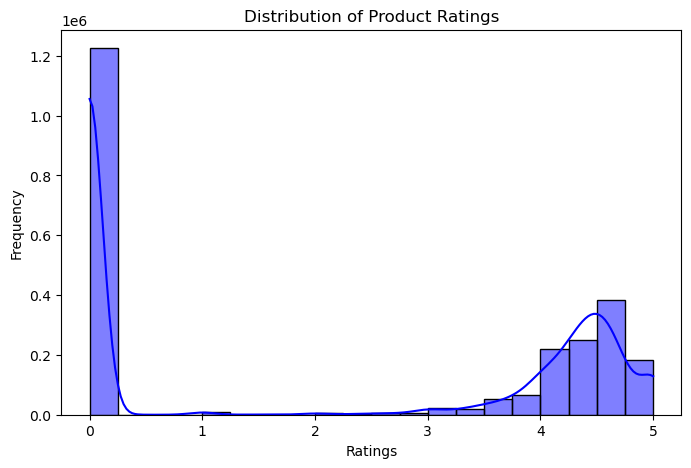

In [ ]:
# Plot Histogram 
plt.figure(figsize=(8, 5))
sns.histplot(df['stars'], bins=20, kde=True, color='blue')

plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Product Ratings')
plt.show()

In [ ]:
#Per Histogram 0 shows a massive peak, it could be argued it is the most common rating, however this might be due to missing rating than actual customer feedback.
#To get more meaningful insight we can recalculate the mode for ratings excluding 0. This might give us the most common actual rating.
filtered_ratings = df[df['stars'] > 0]  # Exclude 0-star ratings
most_common_rating = filtered_ratings['stars'].mode()[0]
print(f'The most common actual rating is: {most_common_rating}')


The most common actual rating is: 4.5


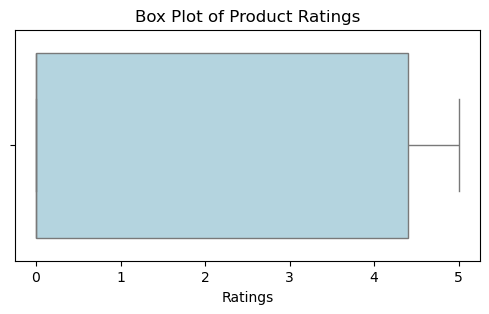

In [84]:
#Checking outliers
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['stars'], color='lightblue')

plt.xlabel('Ratings')
plt.title('Box Plot of Product Ratings')
plt.show()

In [ ]:
#Based on the Box plot, it seems there are no significant outliers in the rating.
#Because the minimum rating is 0, it may be influencing the spread of the box plot.